# Assignment: Project - 5: Featurization, Model Selection and Tuning

#### submitted by Subodh Nath Pushpak

The actual concrete compressive strength (MPa) for a given mixture under a specific age (days) was determined from laboratory. Data is in raw form (not scaled). The data has 8 quantitative input variables, and 1 quantitative output variable, and 1030 instances (observations).
### Domain:
Cement manufacturing
### Context:
Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients.
These ingredients include cement, blast furnace slag, fly ash, water,superplasticizer, coarse aggregate, and fine aggregate
### Objective:
Modeling of strength of high performance concrete using Machine Learning

#### Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
%matplotlib inline
from sklearn import metrics
from scipy.stats import zscore
from sklearn import model_selection
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix

### Data pre-processing

In [2]:
# loading the data
data_df= pd.read_csv('concrete.csv')
data_df.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

### Perform EDA 

#### Shape of the data

In [3]:
rows, cols = data_df.shape # shape of the data
print (f"There are {rows} observations / rows and {cols} attributes / columns")

There are 1030 observations / rows and 9 attributes / columns


In [4]:
# Data type of each attribute
data_df.info() # Info on each of the attribute

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
data_df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

## Task 1 a. Univariate analysis 
Data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers

### Task : Eye ball the data 

In [6]:
# Eye ball the data
data_df.describe().transpose()

count        mean         std     min      25%      50%  \
cement        1030.0  281.167864  104.506364  102.00  192.375  272.900   
slag          1030.0   73.895825   86.279342    0.00    0.000   22.000   
ash           1030.0   54.188350   63.997004    0.00    0.000    0.000   
water         1030.0  181.567282   21.354219  121.80  164.900  185.000   
superplastic  1030.0    6.204660    5.973841    0.00    0.000    6.400   
coarseagg     1030.0  972.918932   77.753954  801.00  932.000  968.000   
fineagg       1030.0  773.580485   80.175980  594.00  730.950  779.500   
age           1030.0   45.662136   63.169912    1.00    7.000   28.000   
strength      1030.0   35.817961   16.705742    2.33   23.710   34.445   

                   75%     max  
cement         350.000   540.0  
slag           142.950   359.4  
ash            118.300   200.1  
water          192.000   247.0  
superplastic    10.200    32.2  
coarseagg     1029.400  1145.0  
fineagg        824.000   992.6  
age             56.000   365.0  
strength        46.135    82.6

### Missing Value identification and appropriate actions

#### Inference

* There are eight independent variables: cement, slag, ash, water, superplastic, coarseagg, fineagg, age
* one dependent variable: strength
* All the attributes are numeric 
* All the attributes have same scale except age attribute

In [7]:
# determine if any value is null
data_df.isnull().values.any() 

False

In [8]:
# determine the sum of na values
data_df.apply(lambda x : sum(x.isnull()))

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [9]:
# determine unique values of columns
for colIndex in data_df.columns:
  print(colIndex)
  print(data_df[colIndex].unique())
  print('---\n')

cement
[141.3 168.9 250.  266.  154.8 255.  166.8 251.4 296.  155.  151.8 173.
 385.  237.5 167.  213.8 336.  190.7 312.7 229.7 228.  236.  132.  331.
 310.  304.  425.  166.1 339.  475.  145.7 313.  178.  165.  277.2 325.
 194.7 246.8 382.  149.  531.3 387.  193.5 326.  337.9 200.  218.9 234.
 309.9 350.  182.  480.  295.7 233.8 379.5 332.5 237.  238.1 323.7 342.
 388.6 147.8 290.4 500.  284.  218.2 190.3 116.  277.  376.  273.  212.5
 362.6 275.1 139.6 427.5 183.9 318.8 252.  149.5 540.  380.  436.  281.
 151.6 326.5 397.  238.  158.6 302.  192.  155.6 160.  222.4 251.8 213.5
 446.  133.  122.6 290.2 375.  181.4 298.2 162.  262.  213.7 313.3 322.
 173.5 299.8 198.6 286.3 349.  520.  252.1 255.5 172.4 212.1 276.  393.
 230.  389.9 157.  359.  374.  102.  202.  252.3 336.5 315.  159.  231.8
 159.8 164.6 136.4 190.  184.  424.  212.  156.  136.  203.5 254.  220.8
 167.4 144.  108.3 214.9 469.  522.  250.2 439.  322.5 153.  525.  259.9
 236.9 366.  333.  145.9 277.1 166.  143.  181.9 450

### Inference
* There are **NO missing values** in the given data.

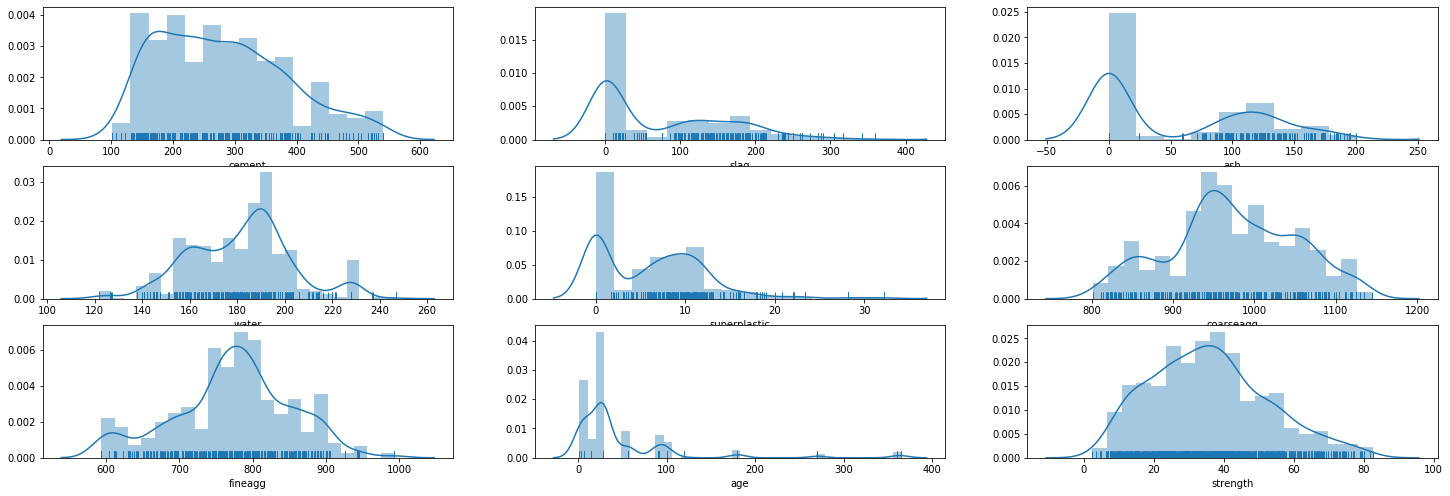

In [10]:
plt.figure(figsize= (25,20))  # Set the figure size
pos = 1    # a variable to manage the position of the subplot in the overall plot
totalrows, totalcols = data_df.shape
#categorical_vars = data_df.describe(include=["object"]).columns
continuous_vars = data_df.describe(exclude=['object']).columns

for feature in data_df.columns: 
    plt.subplot(7, 3, pos)   # plot grid
    if feature in continuous_vars:   # Plot histogram for all the continuous columns
             sns.distplot(data_df[feature], kde= True,rug = True )  
    #if feature in categorical_vars:
          #  sns.countplot(data_df[feature], palette= 'Blues')    # Plot bar chart for all the categorical columns
            #sns.barplot(data_df[feature].value_counts().values, data_df[feature].value_counts().index)
    pos += 1  # to plot over the grid one by one  

In [11]:
print(f"Skweness is: \n{data_df.skew()}")

Skweness is: 
cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64


### Task: Outlier identification and appropriate actions

#### Plot box plots to visualize outliers easily

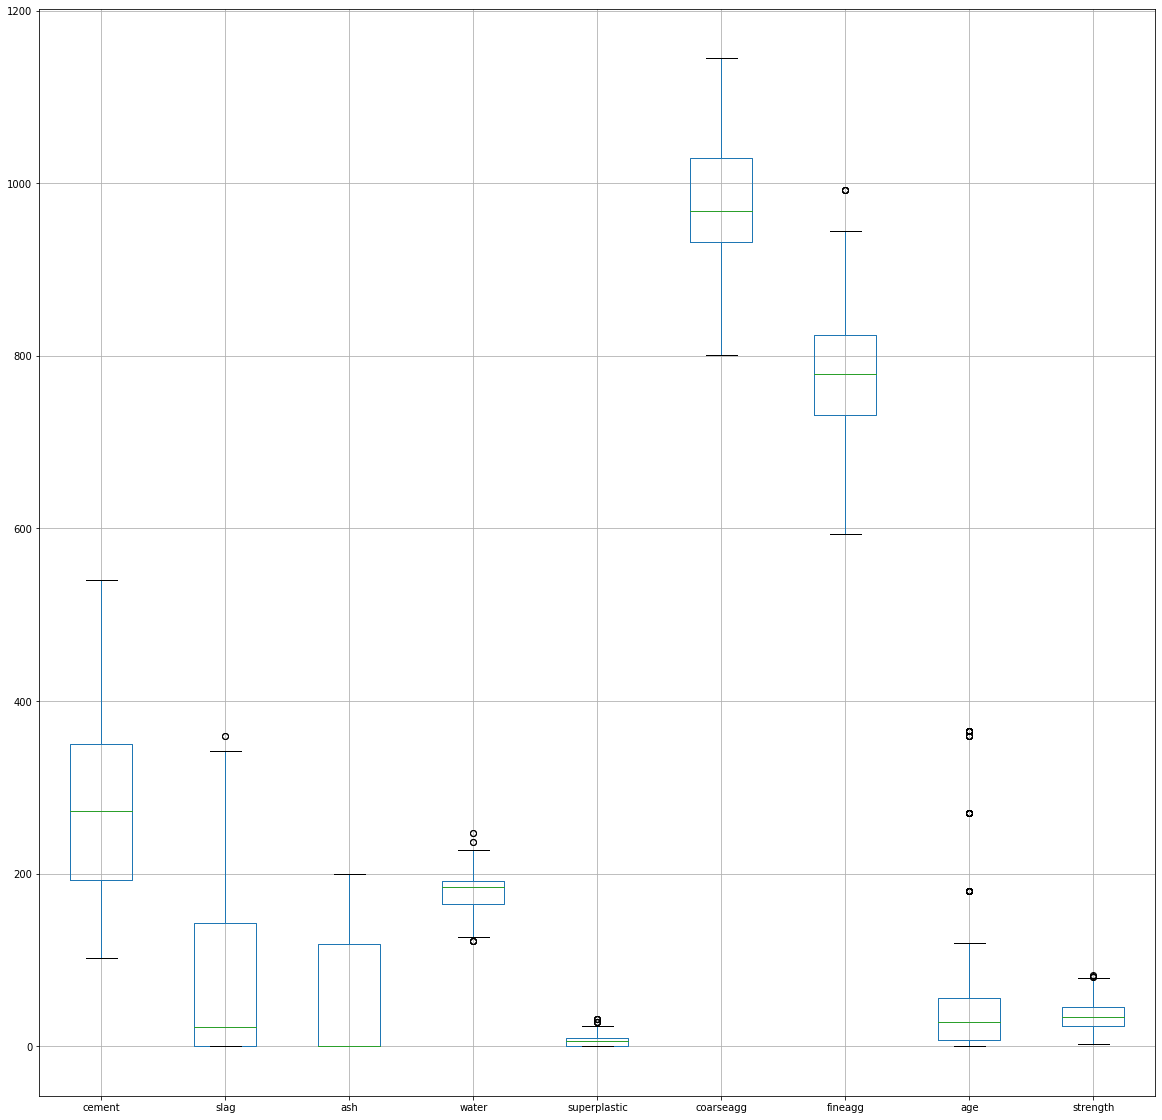

In [12]:
numerical_cols = list(data_df.select_dtypes(exclude=['object']))
_= data_df.boxplot(column=numerical_cols, figsize = (20,20))

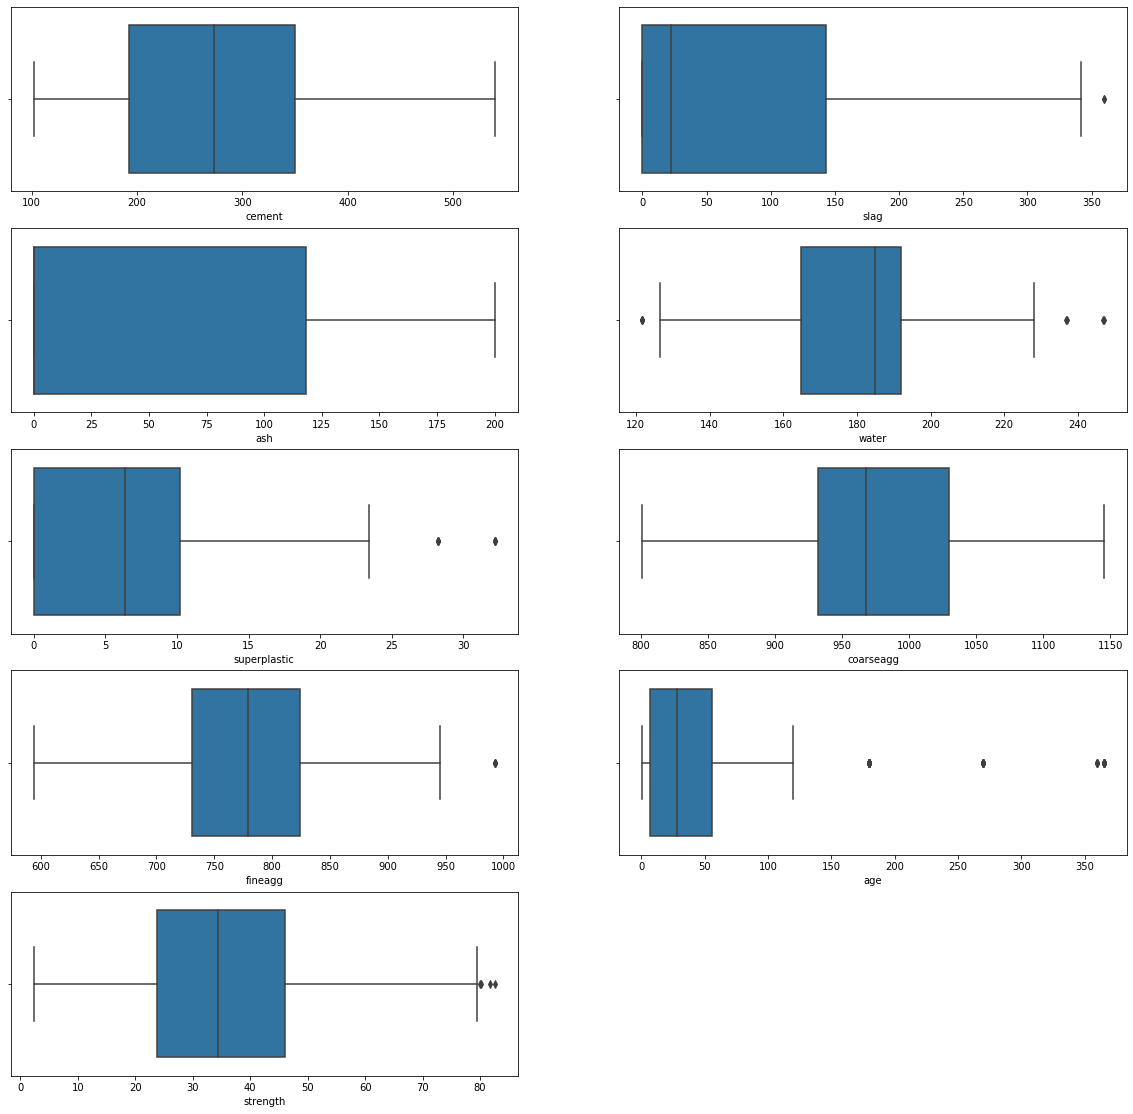

In [13]:
plt.figure(figsize= (20,40)) 
continuous_vars = data_df.describe(exclude=['object']).columns
pos = 1
for feature in continuous_vars: 
    plt.subplot(10, 2, pos)   # plot grid
    sns.boxplot(data_df[feature])
       # plt.title(feature)
    pos += 1  # to plot over the grid one by one  


### Inference
* slag, water, superplastic and age contain outliers.


### Task 2c:  Pick one strategy to address the presence outliers and missing values and perform necessary imputation 


There are many ways to handle oulier data.

* One of the ways is to drop the oulier values rows but that would lead to a reduction of data set and might effect predictions.
* Fill in the oulier values with valid assumptions. We can use binning to put oulier data into proper bins of categories

In [14]:
# function to determine outliers of given series
def determineOutliers(aSeries, columnName):
    
    q1 = aSeries.quantile(0.25)
    q3 = aSeries.quantile(0.75)
   
    iqr = q3-q1 #Interquartile range
    threshold_low  = q1-1.5*iqr
    threshold_high = q3+1.5*iqr
    outliers_low = aSeries[(aSeries < threshold_low)]
    outliers_high= aSeries[(aSeries > threshold_high)]
    
    #print ("Q1: ", q1)
    print (f'\nColumn Name: {columnName}\n')
    print(f'threshold low: {threshold_low} ; low outliers count =', outliers_low.count())
    #data_df.loc[outliers_low.index, columnName] = threshold_low
    #print(f'replaced {outliers_low.count()} low outliers with (q1-1.5*iqr) = {threshold_low}')

    #print ("Q3: ", q3)
    print(f'threshold high: {threshold_high} ; high outliers count = {outliers_high.count()}')
    #print('Outliers high: \n')
    #print(outliers_high)
   
    #data_df.loc[outliers_high.index, columnName] = threshold_high
   # print(f'replaced {outliers_high.count()} high outliers with (q1+1.5*iqr) = {threshold_high}')
    
    return threshold_low,  outliers_low, threshold_high, outliers_high

In [15]:
# get the low and high outliers
continuous_vars = data_df.describe(exclude=['object']).columns
for columnName in continuous_vars:
    threshold_low, outliers_low, threshold_high,  outliers_high = determineOutliers(data_df[columnName],columnName)


Column Name: cement

threshold low: -44.0625 ; low outliers count = 0
threshold high: 586.4375 ; high outliers count = 0

Column Name: slag

threshold low: -214.42499999999998 ; low outliers count = 0
threshold high: 357.375 ; high outliers count = 2

Column Name: ash

threshold low: -177.45 ; low outliers count = 0
threshold high: 295.75 ; high outliers count = 0

Column Name: water

threshold low: 124.25000000000001 ; low outliers count = 5
threshold high: 232.64999999999998 ; high outliers count = 4

Column Name: superplastic

threshold low: -15.299999999999999 ; low outliers count = 0
threshold high: 25.5 ; high outliers count = 10

Column Name: coarseagg

threshold low: 785.8999999999999 ; low outliers count = 0
threshold high: 1175.5000000000002 ; high outliers count = 0

Column Name: fineagg

threshold low: 591.3749999999998 ; low outliers count = 0
threshold high: 963.575 ; high outliers count = 5

Column Name: age

threshold low: -66.5 ; low outliers count = 0
threshold high:

In [16]:
# function to determine outliers of given series AND REPLACE low outlier with q3-1.5*iqr and high outliers with q3+1.5*iqr 
def determineAndReplaceOutliers(aSeries, columnName):
    
    q1 = aSeries.quantile(0.25)
    q3 = aSeries.quantile(0.75)
   
    iqr = q3-q1 #Interquartile range
    threshold_low  = q1-1.5*iqr
    threshold_high = q3+1.5*iqr
    outliers_low = aSeries[(aSeries < threshold_low)]
    outliers_high= aSeries[(aSeries > threshold_high)]
    
    #print ("Q1: ", q1)
    print (f'\nColumn Name: {columnName}\n')
    print(f'threshold low: {threshold_low} ; low outliers count =', outliers_low.count())
    #print('Outliers low: \n')
    #print(outliers_low)
    data_df.loc[outliers_low.index, columnName] = threshold_low
    print(f'replaced {outliers_low.count()} low outliers with (q1-1.5*iqr) = {threshold_low}')

    #print ("Q3: ", q3)
    print(f'threshold high: {threshold_high} ; high outliers count = {outliers_high.count()}')
    #print('Outliers high: \n')
    #print(outliers_high)
   
    data_df.loc[outliers_high.index, columnName] = threshold_high
    print(f'replaced {outliers_high.count()} high outliers with (q1+1.5*iqr) = {threshold_high}')
    
    return threshold_low,  outliers_low, threshold_high, outliers_high

In [17]:
continuous_vars = data_df.describe(exclude=['object']).columns
for columnName in continuous_vars:
    threshold_low, outliers_low, threshold_high,  outliers_high = determineAndReplaceOutliers(data_df[columnName],columnName)


Column Name: cement

threshold low: -44.0625 ; low outliers count = 0
replaced 0 low outliers with (q1-1.5*iqr) = -44.0625
threshold high: 586.4375 ; high outliers count = 0
replaced 0 high outliers with (q1+1.5*iqr) = 586.4375

Column Name: slag

threshold low: -214.42499999999998 ; low outliers count = 0
replaced 0 low outliers with (q1-1.5*iqr) = -214.42499999999998
threshold high: 357.375 ; high outliers count = 2
replaced 2 high outliers with (q1+1.5*iqr) = 357.375

Column Name: ash

threshold low: -177.45 ; low outliers count = 0
replaced 0 low outliers with (q1-1.5*iqr) = -177.45
threshold high: 295.75 ; high outliers count = 0
replaced 0 high outliers with (q1+1.5*iqr) = 295.75

Column Name: water

threshold low: 124.25000000000001 ; low outliers count = 5
replaced 5 low outliers with (q1-1.5*iqr) = 124.25000000000001
threshold high: 232.64999999999998 ; high outliers count = 4
replaced 4 high outliers with (q1+1.5*iqr) = 232.64999999999998

Column Name: superplastic

threshol

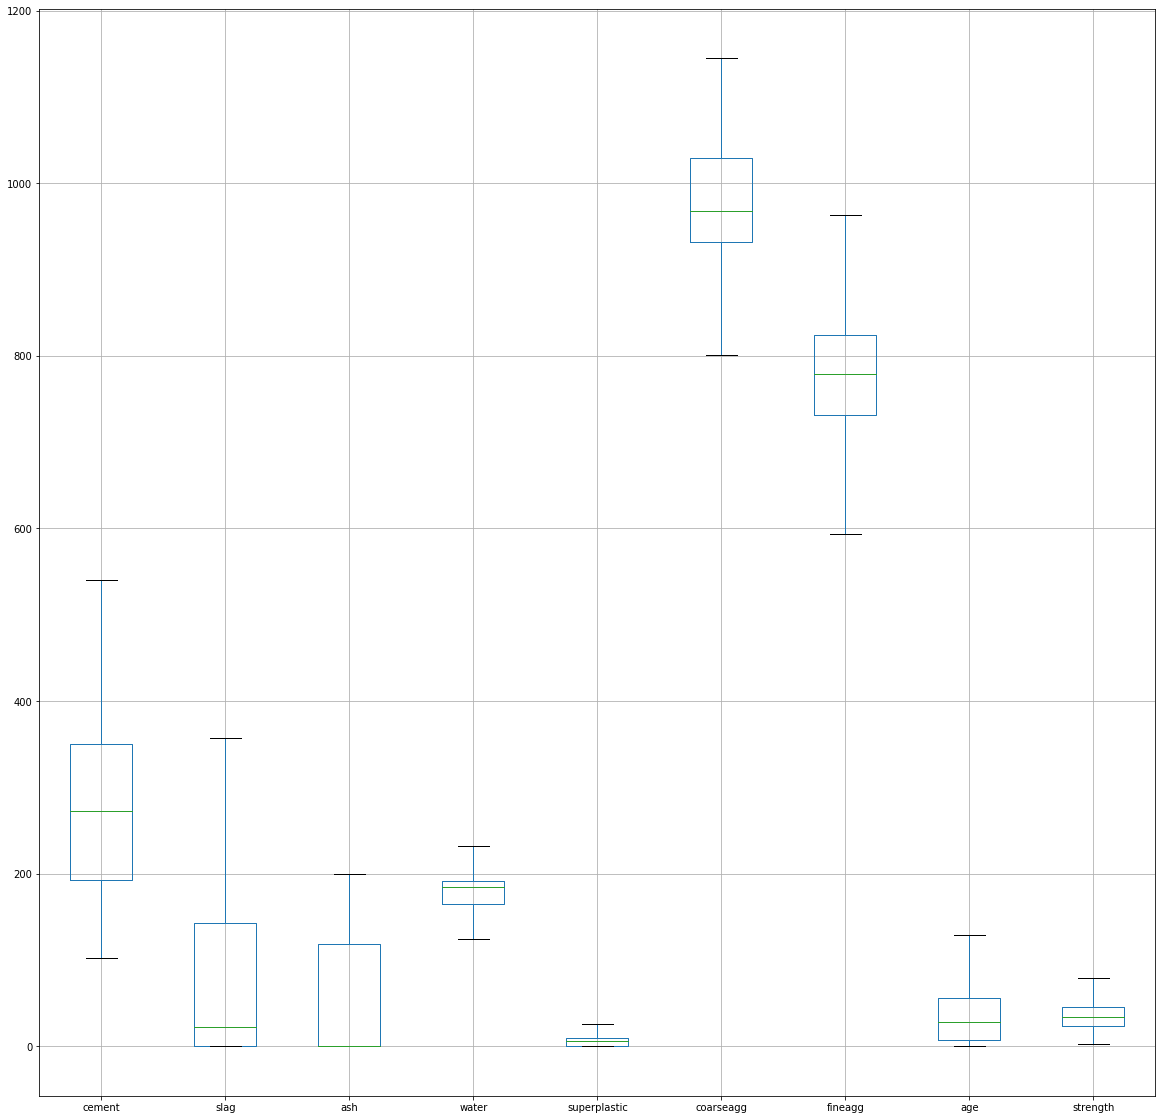

In [18]:
# Plot box plot again to visualize outliers
numerical_cols = list(data_df.select_dtypes(exclude=['object']))
_= data_df.boxplot(column=numerical_cols, figsize = (20,20))

#### Inference
* Instead of dropping the rows; we have replaced the low outliers with (Q1 - 1.5 IQR) and high outliers with (Q3 + 1.5 IQR)

### Task 2 b: . Multivariate analysis 
Bi-variate analysis between the predictor variables and between the predictor variables and target column.
Comment on your findings in terms of their relationship and degree of relation if any. Presence of leverage points.
Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attribute

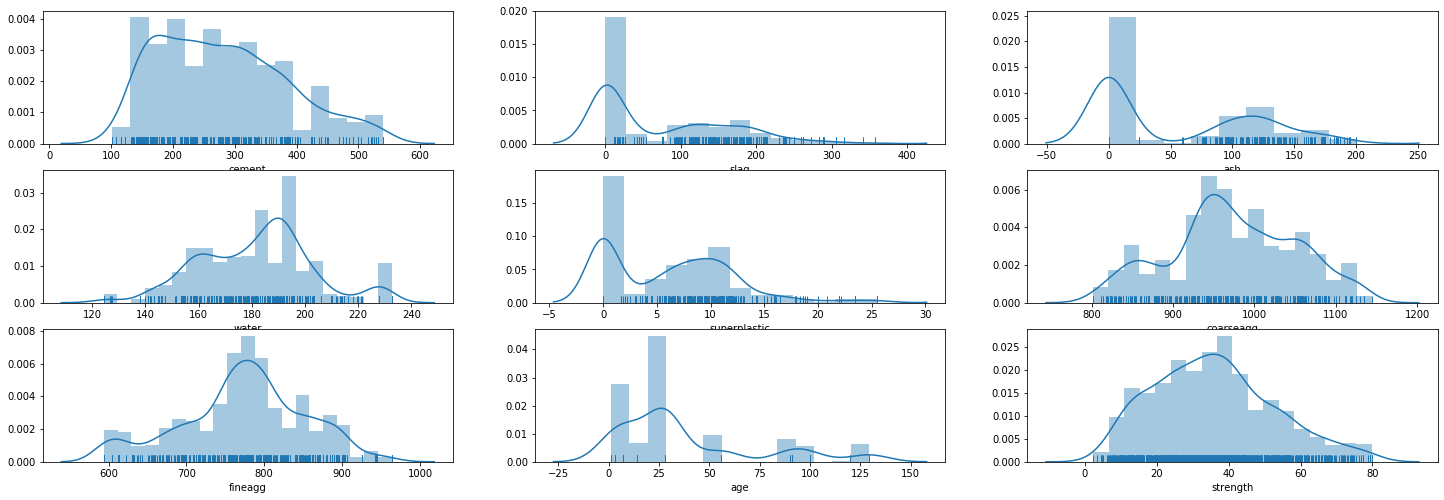

In [19]:
plt.figure(figsize= (25,20))  # Set the figure size
pos = 1    # a variable to manage the position of the subplot in the overall plot
totalrows, totalcols = data_df.shape
#categorical_vars = data_df.describe(include=["object"]).columns
continuous_vars = data_df.describe(exclude=['object']).columns

for feature in data_df.columns: 
    plt.subplot(7, 3, pos)   # plot grid
    if feature in continuous_vars:   # Plot histogram for all the continuous columns
             sns.distplot(data_df[feature], kde= True,rug = True )  
    #if feature in categorical_vars:
          #  sns.countplot(data_df[feature], palette= 'Blues')    # Plot bar chart for all the categorical columns
            #sns.barplot(data_df[feature].value_counts().values, data_df[feature].value_counts().index)
    pos += 1  # to plot over the grid one by one  

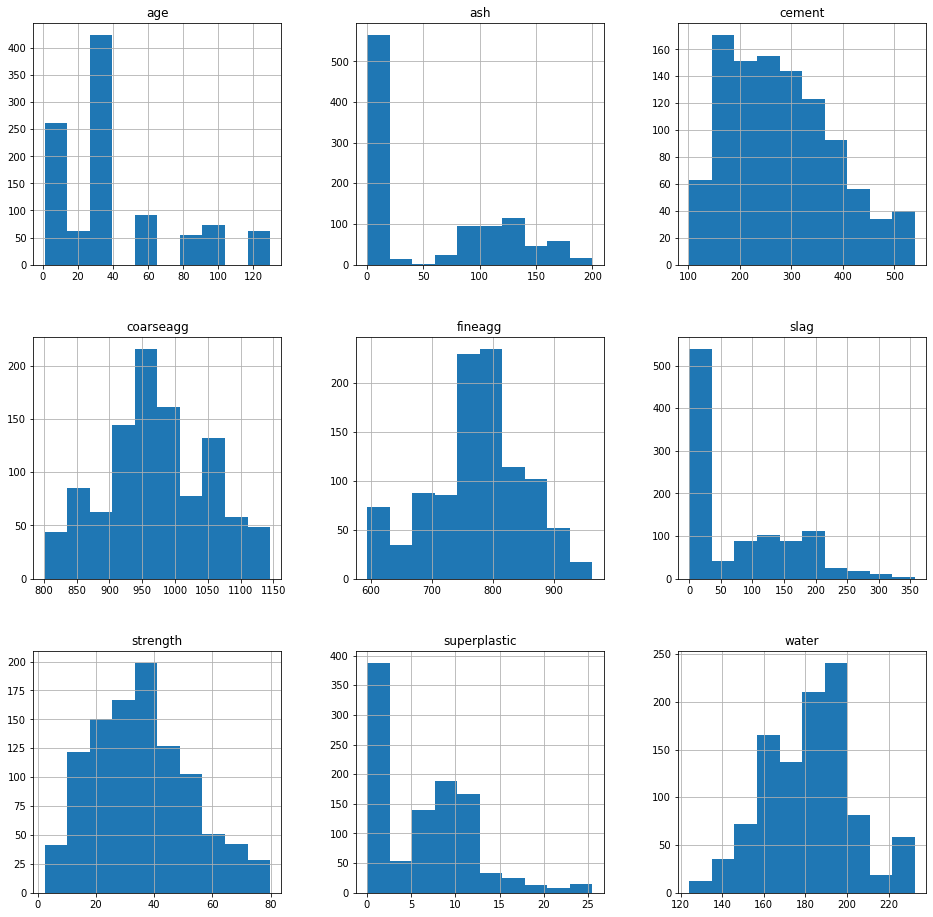

In [20]:
# List numerical columns
numerical_cols = list(data_df.select_dtypes(exclude=['object']))
_= data_df.hist(column=numerical_cols, figsize = (16,16))

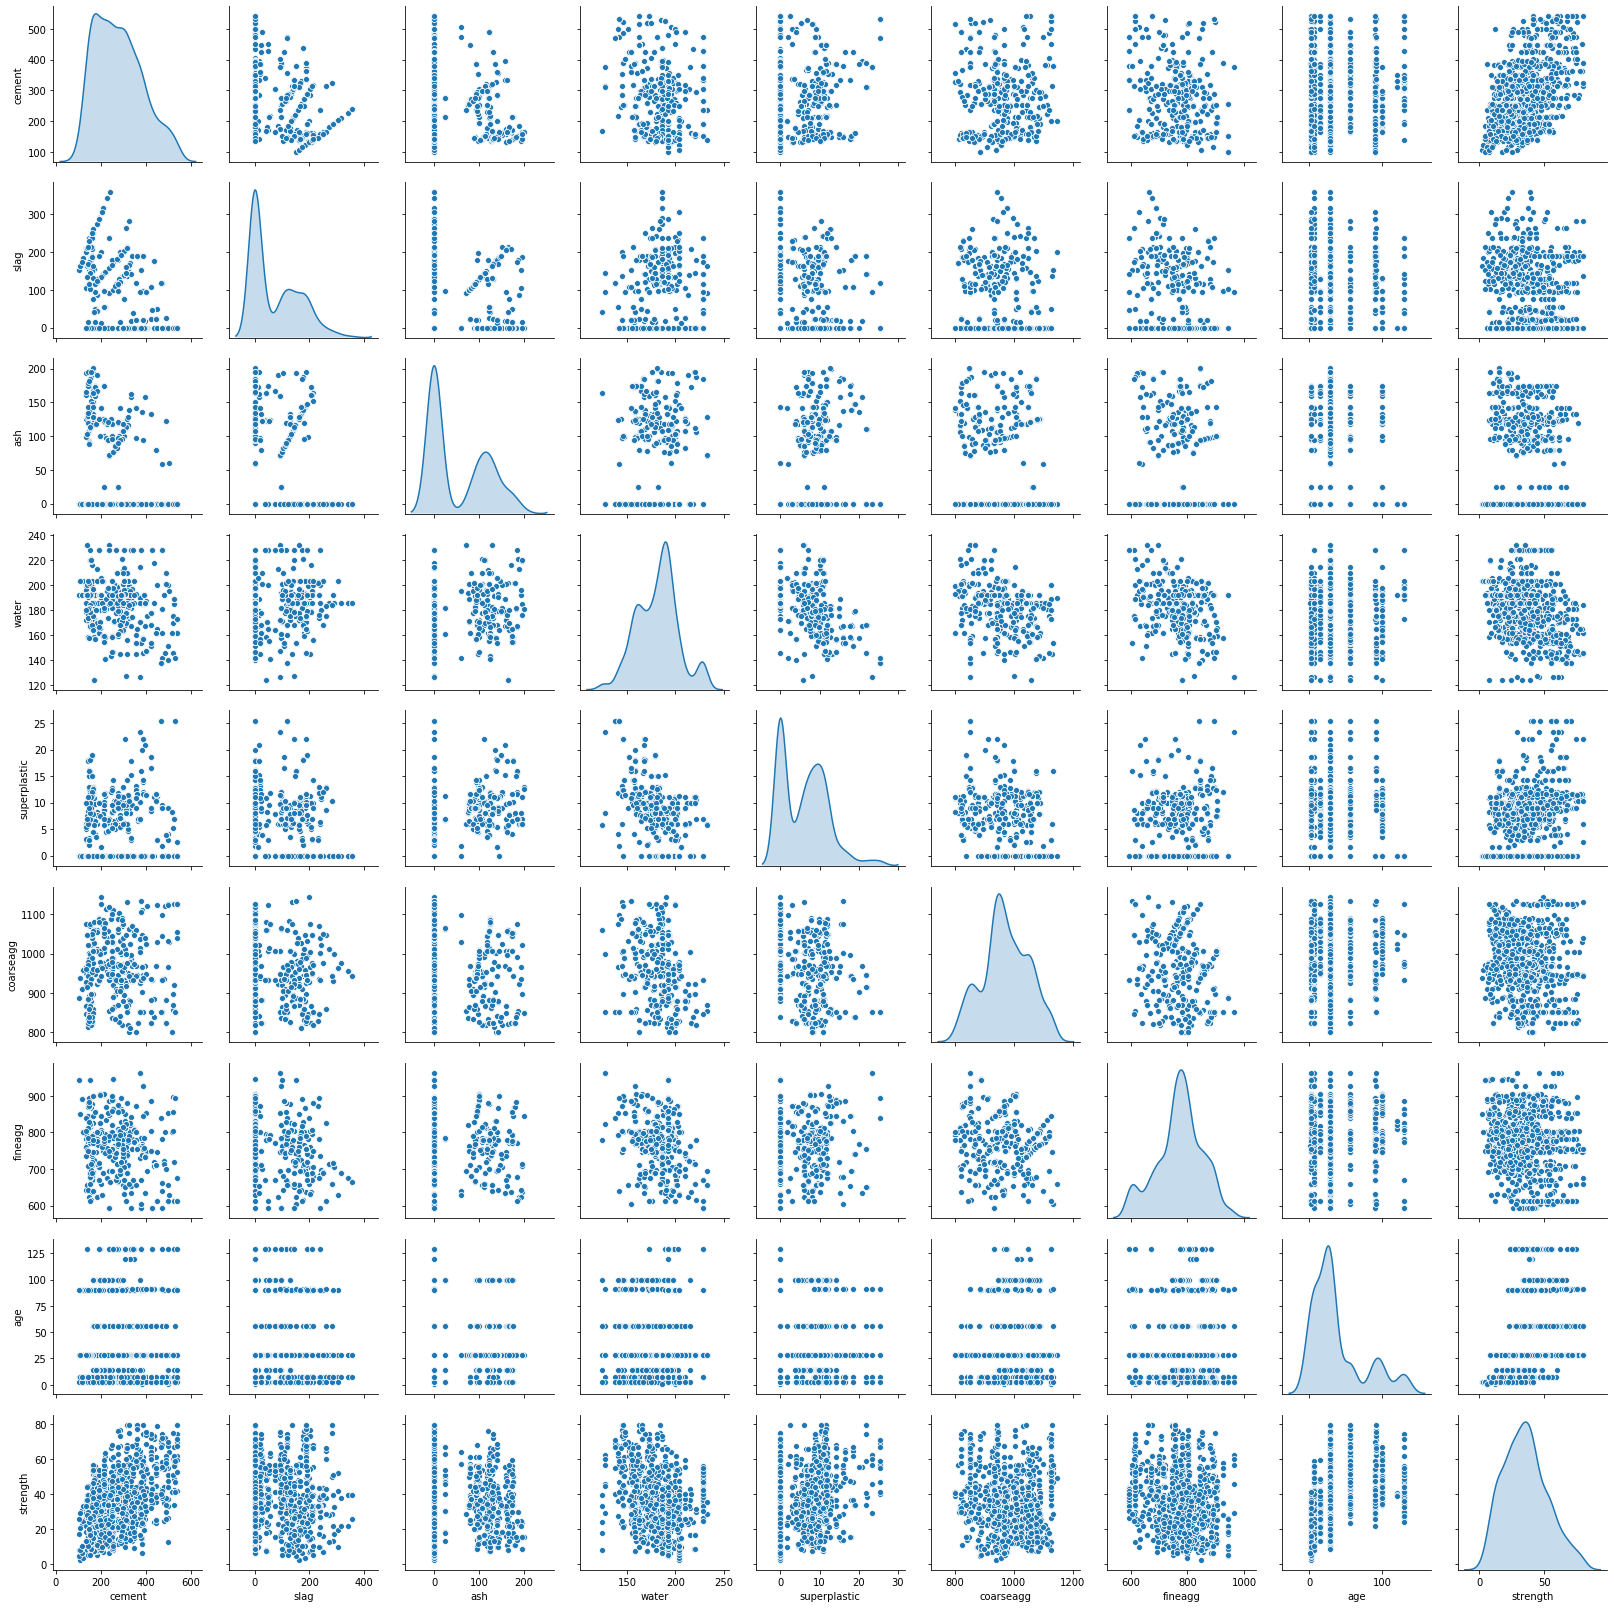

In [21]:
sns.pairplot(data_df,diag_kind='kde')
plt.show()

In [22]:
data_df.corr()

cement      slag       ash     water  superplastic  coarseagg  \
cement        1.000000 -0.275239 -0.397467 -0.081617      0.079619  -0.109349   
slag         -0.275239  1.000000 -0.323590  0.107031      0.043724  -0.284023   
ash          -0.397467 -0.323590  1.000000 -0.258379      0.395319  -0.009961   
water        -0.081617  0.107031 -0.258379  1.000000     -0.665260  -0.180249   
superplastic  0.079619  0.043724  0.395319 -0.665260      1.000000  -0.261624   
coarseagg    -0.109349 -0.284023 -0.009961 -0.180249     -0.261624   1.000000   
fineagg      -0.225311 -0.283263  0.080962 -0.448979      0.216947  -0.176542   
age           0.054325 -0.052703 -0.092704  0.189637     -0.122913   0.012295   
strength      0.498008  0.134621 -0.105577 -0.290969      0.366235  -0.165250   

               fineagg       age  strength  
cement       -0.225311  0.054325  0.498008  
slag         -0.283263 -0.052703  0.134621  
ash           0.080962 -0.092704 -0.105577  
water        -0.448979  0.189637 -0.290969  
superplastic  0.216947 -0.122913  0.366235  
coarseagg    -0.176542  0.012295 -0.165250  
fineagg       1.000000 -0.096565 -0.169601  
age          -0.096565  1.000000  0.469807  
strength     -0.169601  0.469807  1.000000

ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

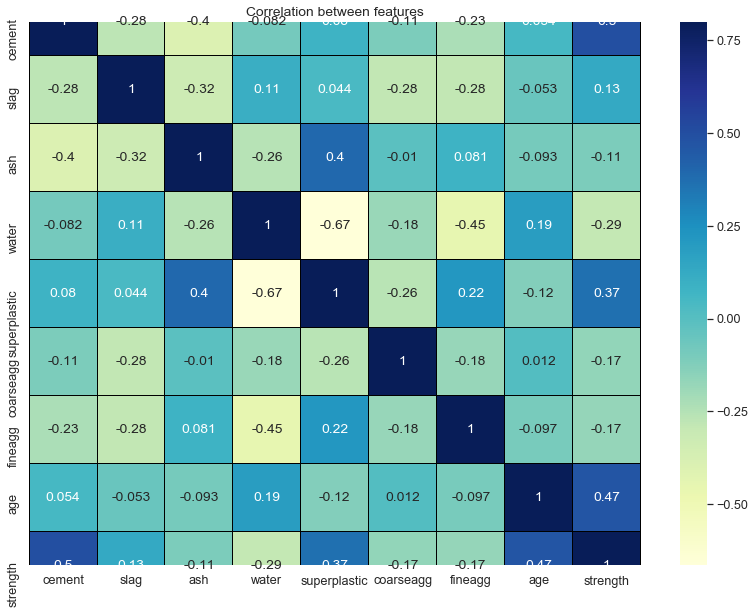

In [23]:
sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(data_df.corr(), vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap="YlGnBu",linecolor="black")
plt.title('Correlation between features');plt.show()
plt.show()

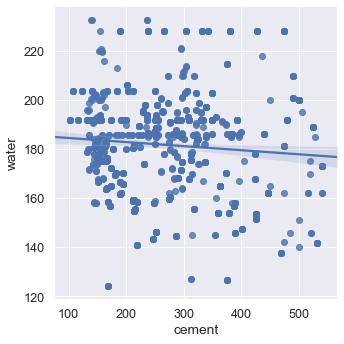

In [24]:
# water vs cement
sns.lmplot(x="cement",y="water",data=data_df)
plt.show()

### Inference

* cement is almost normal.
* slag has three gausssians and rightly skewed.
* ash has two gaussians and rightly skewed.
* water has three guassians and slighly left skewed.
* superplastic has two gaussians and rightly skewed.
* coarseagg has three guassians and almost normal.
* fineagg has almost two guassians and looks like normal.
* age has multiple guassians and rightly skewed.


### TASK -2 (Feature Engineering techniques)

### Scale the data with zscore

In [25]:
#Scaling the features
from scipy.stats import zscore
data_df_original = data_df
data_df = data_df.apply(zscore)
data_df.head

<bound method NDFrame.head of         cement      slag       ash     water  superplastic  coarseagg  \
0    -1.339017  1.601727 -0.847144  1.034976     -1.061968  -0.014398   
1    -1.074790 -0.367551  1.096078 -1.095618      0.800217   1.388141   
2    -0.298384 -0.856971  0.648965  0.276070     -0.113633  -0.206121   
3    -0.145209  0.465159 -0.847144  2.189833     -1.061968  -0.526517   
4    -1.209776  1.270035 -0.847144  0.554178      0.507095   0.958372   
...        ...       ...       ...       ...           ...        ...   
1025 -1.399330 -0.856971  1.747988 -0.072744      0.662278  -0.153365   
1026  2.394626 -0.856971 -0.847144 -1.873379      3.334858  -1.554617   
1027 -0.045645  0.488354  0.564545 -0.091599      0.472611  -1.323005   
1028  0.582373 -0.416261 -0.847144  2.189833     -1.061968  -0.526517   
1029  2.477915 -0.856971 -0.847144 -0.402703     -1.061968   1.956877   

       fineagg       age  strength  
0    -0.312618 -0.281572 -0.355005  
1     0.285302 -0.6

### Task 2 a Identify opportunities (if any) to create a composite feature, drop a feature etc. 

### Inference

* water attribute have negative linear relationship with superplastic and fineagg. 
* strength is positive linearly related to the cement. For a given value of cement strength have  multiple values.
* cement attribute does not have any significant corelation with slag, ash, water, superplatic, coarseagg,fineagg and age.
* slag  attribute does not have any significant corelation with ash, water, superplatic, coarseagg,fineagg and age
* ash  attribute does not have any significant corelation with water, superplatic, coarseagg,fineagg and age



* If there are attributes which are very strongly correlated (positively of negatively); then such the attribiues are redundant. In such cases we can drop one the attributes depending on business value. 
* These highly correlated attribues can also be combined to create a composite dimension out of it.

### Task 2 b: Decide on complexity of the model
should it be simple linear model in terms of parameters or would a quadratic or higher degree 

### Task 2c: Explore for gaussians. 
Explore for gaussians. If data is likely to be a mix of gaussians,explore individual clusters and present your findings in  terms of the independent attributes and their suitability to predict strength 

### Inference
* cement attribute have almost normal curve.
* slag has two gausssians and rightly skewed.
* ash has two gaussians and rightly skewed.
* water has atleast guassians and slighly left skewed.
* superplastic has multiple gaussians and rightly skewed.
* coarseagg has three guassians and almost normal.
* fineagg has almost two guassians and looks like normal.
* age has multiple guassians and rightly skewed. 
* strength is close to a normal curve.


In [26]:
#Splitting the data into independent and dependent attributes
X=data_df.iloc[:,0:8]
y = data_df.iloc[:,8]

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
X_train.shape,X_test.shape

((721, 8), (309, 8))

### Task 3  (create the model ) 
Obtain feature importance for the individual features and present your findings 

In [28]:
# Store the results from algoritms in results for easy evaluation
result = pd.DataFrame({'Model' : [ 'Training Score','Accuracy', 'cross_val_score_accuracy','cross_val_score_std']})
result.T

0         1                         2                    3
Model  Training Score  Accuracy  cross_val_score_accuracy  cross_val_score_std

### Task 4a (Tuning the model)
Algorithms that you think will be suitable for this project

In [29]:
# User defined functions

# Print the output of various algo in nice format with score, recall, precision, specificity, f1_score
def fit_n_print(model, X_train, X_test, y_train, y_test,num_folds,seed):  # take the model, and data as inputs
    from sklearn import metrics
    from sklearn.model_selection import KFold
    from sklearn.model_selection import cross_val_score
    
    model.fit(X_train, y_train)   # for the model with the train data

    pred = model.predict(X_test)  # make predictions on the test set

    score_train = round(model.score(X_train, y_train), 3) # accuracy for train data
    
    score = round(model.score(X_test, y_test), 3)   # compute accuracy score for test set
    
    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    results = cross_val_score(model,X, y, cv=kfold)
    
    cross_val_score_accuracy=np.mean(abs(results))
    cross_val_score_std= results.std()
    #cross_val_score_raw = "for raw data (18 dimension) cross_val_score Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0)

    #print('cross_val_score Average accuracy: ',accuracy)
    #print('cross_val_score Standard Deviation: ',results.std())
    #mse = metrics.mean_squared_error(y_test, y_pred)
    
    #rsquared = metrics.r2_score(y_test, y_pred)
    
    
    return score_train, score,  cross_val_score_accuracy,cross_val_score_std   # return all the metrics

### Task 4b: Techniques employed to squeeze that extra performance
out of the model without making it overfit or underfit 

In [30]:
# Import Decision Tree Regressor machine learning library
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train , y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [31]:
#printing the feature importance 
print('Feature importances: \n',pd.DataFrame(dt_model.feature_importances_,columns=['Imp'],index=X_train.columns))

Feature importances: 
                    Imp
cement        0.337532
slag          0.076798
ash           0.011095
water         0.157920
superplastic  0.053050
coarseagg     0.020026
fineagg       0.028064
age           0.315515


In [32]:
#importing the metrics 
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
num_folds = 18
seed = 77
result['Decision Trees Regressor']  = fit_n_print(dt_model, X_train, X_test, y_train, y_test, num_folds,seed )
result.T

0         1                         2  \
Model                     Training Score  Accuracy  cross_val_score_accuracy   
Decision Trees Regressor           0.999     0.766                    0.8525   

                                            3  
Model                     cross_val_score_std  
Decision Trees Regressor            0.0687149

In [33]:
from sklearn.linear_model import LinearRegression
dt_model = LinearRegression()
dt_model.fit(X_train , y_train)
result['Linear Regressor']  = fit_n_print(dt_model, X_train, X_test, y_train, y_test, num_folds,seed )
result.T

0         1                         2  \
Model                     Training Score  Accuracy  cross_val_score_accuracy   
Decision Trees Regressor           0.999     0.766                    0.8525   
Linear Regressor                   0.726     0.732                  0.705538   

                                            3  
Model                     cross_val_score_std  
Decision Trees Regressor            0.0687149  
Linear Regressor                    0.0693268

In [34]:
from sklearn.linear_model import Ridge
dt_model = Ridge()
dt_model.fit(X_train , y_train)
result['Ridge Regressor']  = fit_n_print(dt_model, X_train, X_test, y_train, y_test, num_folds,seed )
result.T

0         1                         2  \
Model                     Training Score  Accuracy  cross_val_score_accuracy   
Decision Trees Regressor           0.999     0.766                    0.8525   
Linear Regressor                   0.726     0.732                  0.705538   
Ridge Regressor                    0.726     0.732                  0.705537   

                                            3  
Model                     cross_val_score_std  
Decision Trees Regressor            0.0687149  
Linear Regressor                    0.0693268  
Ridge Regressor                     0.0693687

In [35]:
# Import ensemble machine learning library
from sklearn.ensemble import RandomForestRegressor
dt_model = RandomForestRegressor()
dt_model.fit(X_train , y_train)
result['Random Forest Regressor']  = fit_n_print(dt_model, X_train, X_test, y_train, y_test, num_folds,seed )
result.T

0         1                         2  \
Model                     Training Score  Accuracy  cross_val_score_accuracy   
Decision Trees Regressor           0.999     0.766                    0.8525   
Linear Regressor                   0.726     0.732                  0.705538   
Ridge Regressor                    0.726     0.732                  0.705537   
Random Forest Regressor            0.986     0.899                  0.908727   

                                            3  
Model                     cross_val_score_std  
Decision Trees Regressor            0.0687149  
Linear Regressor                    0.0693268  
Ridge Regressor                     0.0693687  
Random Forest Regressor             0.0448519

In [36]:
# Import ensemble machine learning library
from sklearn.ensemble import  GradientBoostingRegressor
dt_model = GradientBoostingRegressor()
dt_model.fit(X_train , y_train)
result['Gradient Boosting Regressor']  = fit_n_print(dt_model, X_train, X_test, y_train, y_test, num_folds,seed )
result.T

0         1  \
Model                        Training Score  Accuracy   
Decision Trees Regressor              0.999     0.766   
Linear Regressor                      0.726     0.732   
Ridge Regressor                       0.726     0.732   
Random Forest Regressor               0.986     0.899   
Gradient Boosting Regressor           0.952     0.895   

                                                    2                    3  
Model                        cross_val_score_accuracy  cross_val_score_std  
Decision Trees Regressor                       0.8525            0.0687149  
Linear Regressor                             0.705538            0.0693268  
Ridge Regressor                              0.705537            0.0693687  
Random Forest Regressor                      0.908727            0.0448519  
Gradient Boosting Regressor                  0.901311            0.0326452

In [37]:
# Import ensemble machine learning library
from sklearn.ensemble import AdaBoostRegressor
dt_model = AdaBoostRegressor()
dt_model.fit(X_train , y_train)
result['AdaBoost Regressor']  = fit_n_print(dt_model, X_train, X_test, y_train, y_test, num_folds,seed )
result.T

0         1  \
Model                        Training Score  Accuracy   
Decision Trees Regressor              0.999     0.766   
Linear Regressor                      0.726     0.732   
Ridge Regressor                       0.726     0.732   
Random Forest Regressor               0.986     0.899   
Gradient Boosting Regressor           0.952     0.895   
AdaBoost Regressor                    0.823     0.765   

                                                    2                    3  
Model                        cross_val_score_accuracy  cross_val_score_std  
Decision Trees Regressor                       0.8525            0.0687149  
Linear Regressor                             0.705538            0.0693268  
Ridge Regressor                              0.705537            0.0693687  
Random Forest Regressor                      0.908727            0.0448519  
Gradient Boosting Regressor                  0.901311            0.0326452  
AdaBoost Regressor                           0.777773            0.0441918

In [38]:
# Import ensemble machine learning library
from sklearn.ensemble import BaggingRegressor
dt_model = BaggingRegressor()
dt_model.fit(X_train , y_train)
result['Bagging Regressor']  = fit_n_print(dt_model, X_train, X_test, y_train, y_test, num_folds,seed )
result.T

0         1  \
Model                        Training Score  Accuracy   
Decision Trees Regressor              0.999     0.766   
Linear Regressor                      0.726     0.732   
Ridge Regressor                       0.726     0.732   
Random Forest Regressor               0.986     0.899   
Gradient Boosting Regressor           0.952     0.895   
AdaBoost Regressor                    0.823     0.765   
Bagging Regressor                     0.977      0.88   

                                                    2                    3  
Model                        cross_val_score_accuracy  cross_val_score_std  
Decision Trees Regressor                       0.8525            0.0687149  
Linear Regressor                             0.705538            0.0693268  
Ridge Regressor                              0.705537            0.0693687  
Random Forest Regressor                      0.908727            0.0448519  
Gradient Boosting Regressor                  0.901311            0.0326452  
AdaBoost Regressor                           0.777773            0.0441918  
Bagging Regressor                            0.894654            0.0451804

In [39]:
# Import KNN Regressor machine learning library
from sklearn.neighbors import KNeighborsRegressor
dt_model = KNeighborsRegressor()
dt_model.fit(X_train , y_train)
result['KNeighbors Regressor']  = fit_n_print(dt_model, X_train, X_test, y_train, y_test, num_folds,seed )
result.T

0         1  \
Model                        Training Score  Accuracy   
Decision Trees Regressor              0.999     0.766   
Linear Regressor                      0.726     0.732   
Ridge Regressor                       0.726     0.732   
Random Forest Regressor               0.986     0.899   
Gradient Boosting Regressor           0.952     0.895   
AdaBoost Regressor                    0.823     0.765   
Bagging Regressor                     0.977      0.88   
KNeighbors Regressor                  0.848     0.777   

                                                    2                    3  
Model                        cross_val_score_accuracy  cross_val_score_std  
Decision Trees Regressor                       0.8525            0.0687149  
Linear Regressor                             0.705538            0.0693268  
Ridge Regressor                              0.705537            0.0693687  
Random Forest Regressor                      0.908727            0.0448519  
Gradient Boosting Regressor                  0.901311            0.0326452  
AdaBoost Regressor                           0.777773            0.0441918  
Bagging Regressor                            0.894654            0.0451804  
KNeighbors Regressor                         0.756212            0.0761647

In [40]:
values=[]
for i in range(1,30):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    values.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Mean error')

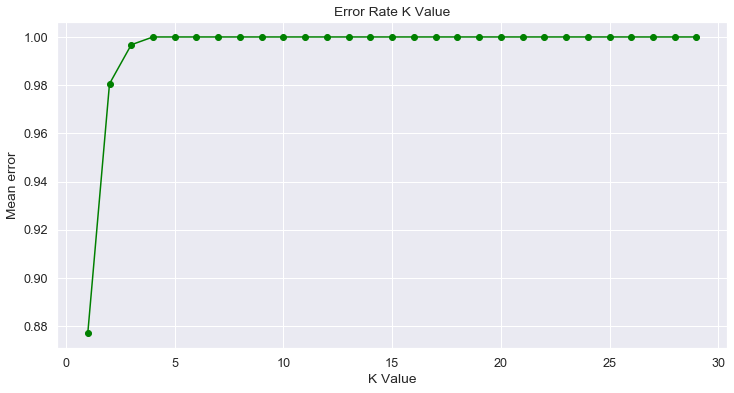

In [41]:

plt.figure(figsize=(12,6))
plt.plot(range(1,30),values,color='green',marker='o')
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean error')

In [42]:
# Import KNN Regressor machine learning library
from sklearn.neighbors import KNeighborsRegressor
dt_model = KNeighborsRegressor(n_neighbors=3)
dt_model.fit(X_train , y_train)
result['KNeighbors Regressor (k=3)']  = fit_n_print(dt_model, X_train, X_test, y_train, y_test, num_folds,seed )
result.T

0         1  \
Model                        Training Score  Accuracy   
Decision Trees Regressor              0.999     0.766   
Linear Regressor                      0.726     0.732   
Ridge Regressor                       0.726     0.732   
Random Forest Regressor               0.986     0.899   
Gradient Boosting Regressor           0.952     0.895   
AdaBoost Regressor                    0.823     0.765   
Bagging Regressor                     0.977      0.88   
KNeighbors Regressor                  0.848     0.777   
KNeighbors Regressor (k=3)            0.875     0.792   

                                                    2                    3  
Model                        cross_val_score_accuracy  cross_val_score_std  
Decision Trees Regressor                       0.8525            0.0687149  
Linear Regressor                             0.705538            0.0693268  
Ridge Regressor                              0.705537            0.0693687  
Random Forest Regressor                      0.908727            0.0448519  
Gradient Boosting Regressor                  0.901311            0.0326452  
AdaBoost Regressor                           0.777773            0.0441918  
Bagging Regressor                            0.894654            0.0451804  
KNeighbors Regressor                         0.756212            0.0761647  
KNeighbors Regressor (k=3)                    0.76908            0.0704122

In [43]:
# Import support vector regressor machine learning library
from sklearn.svm import SVR
dt_model = SVR(kernel='linear')
dt_model.fit(X_train , y_train)
result['KNeighbors Regressor (k=3)']  = fit_n_print(dt_model, X_train, X_test, y_train, y_test, num_folds,seed )
result.T

0         1  \
Model                        Training Score  Accuracy   
Decision Trees Regressor              0.999     0.766   
Linear Regressor                      0.726     0.732   
Ridge Regressor                       0.726     0.732   
Random Forest Regressor               0.986     0.899   
Gradient Boosting Regressor           0.952     0.895   
AdaBoost Regressor                    0.823     0.765   
Bagging Regressor                     0.977      0.88   
KNeighbors Regressor                  0.848     0.777   
KNeighbors Regressor (k=3)            0.723     0.738   

                                                    2                    3  
Model                        cross_val_score_accuracy  cross_val_score_std  
Decision Trees Regressor                       0.8525            0.0687149  
Linear Regressor                             0.705538            0.0693268  
Ridge Regressor                              0.705537            0.0693687  
Random Forest Regressor                      0.908727            0.0448519  
Gradient Boosting Regressor                  0.901311            0.0326452  
AdaBoost Regressor                           0.777773            0.0441918  
Bagging Regressor                            0.894654            0.0451804  
KNeighbors Regressor                         0.756212            0.0761647  
KNeighbors Regressor (k=3)                   0.702161            0.0713201

In [44]:
#Multiple model Ensemble
from sklearn import svm
#Import the Voting regressor for Ensemble
from sklearn.ensemble import VotingRegressor 

LR=LinearRegression()
KN=KNeighborsRegressor(n_neighbors=3)
SVM=svm.SVR(kernel='linear')

In [45]:
evc=VotingRegressor(estimators=[('LR',LR),('KN',KN),('SVM',SVM)])
evc.fit(X_train, y_train)

VotingRegressor(estimators=[('LR',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False)),
                            ('KN',
                             KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=3,
                                                 p=2, weights='uniform')),
                            ('SVM',
                             SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='linear',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False))],
                n_jobs=None, weights=None)

In [46]:
y_pred = evc.predict(X_test)
# performance on train data
print('Performance on training data using ensemble:',evc.score(X_train,y_train))
# performance on test data
print('Performance on testing data using ensemble:',evc.score(X_test,y_test))
#Evaluate the model using accuracy
acc_E=metrics.r2_score(y_test, y_pred)
print('Accuracy ensemble: ',acc_E)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using ensemble: 0.815315794442887
Performance on testing data using ensemble: 0.7990655982951731
Accuracy ensemble:  0.7990655982951731
MSE:  0.19202574617939983


### Pruned Decision tree


In [47]:
#Drop the least significant variable
data_df.info()
#Create a copy of the dataset
data_df_original=data_df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null float64
strength        1030 non-null float64
dtypes: float64(9)
memory usage: 72.5 KB


In [48]:

X = data_df.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = data_df['strength']
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

clf_pruned = DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')
result['Decision Trees (With Pruning)'] = fit_n_print(clf_pruned, X_train, X_test, y_train, y_test, num_folds,seed )
result.T

0         1  \
Model                          Training Score  Accuracy   
Decision Trees Regressor                0.999     0.766   
Linear Regressor                        0.726     0.732   
Ridge Regressor                         0.726     0.732   
Random Forest Regressor                 0.986     0.899   
Gradient Boosting Regressor             0.952     0.895   
AdaBoost Regressor                      0.823     0.765   
Bagging Regressor                       0.977      0.88   
KNeighbors Regressor                    0.848     0.777   
KNeighbors Regressor (k=3)              0.723     0.738   
Decision Trees (With Pruning)           0.994     0.836   

                                                      2                    3  
Model                          cross_val_score_accuracy  cross_val_score_std  
Decision Trees Regressor                         0.8525            0.0687149  
Linear Regressor                               0.705538            0.0693268  
Ridge Regressor                                0.705537            0.0693687  
Random Forest Regressor                        0.908727            0.0448519  
Gradient Boosting Regressor                    0.901311            0.0326452  
AdaBoost Regressor                             0.777773            0.0441918  
Bagging Regressor                              0.894654            0.0451804  
KNeighbors Regressor                           0.756212            0.0761647  
KNeighbors Regressor (k=3)                     0.702161            0.0713201  
Decision Trees (With Pruning)                  0.836289            0.0831283

In [49]:
#printing the feature importance 
print('Feature importances: \n',pd.DataFrame(clf_pruned.feature_importances_,columns=['Imp'],index=X_train.columns))

Feature importances: 
                    Imp
cement        0.379626
slag          0.113981
water         0.133654
superplastic  0.035598
age           0.337140


### Inference
* After applying all the models we can see that Random Forest Regressor, Random Forest Regressor k fold, Gradient Boost Regressor, Gradient Boost Regressor k fold are giving better results as compared to other models.
* Now as the dataset have different gaussians, we can apply k means clustering and then we can apply the models and compare the accuracy.

### Task 4c: Model performance range at 95% confidence level

In [50]:
concrete_XY = X.join(y)

#### Resampling with GradientBoostingRegressor

In [53]:
from sklearn.utils import resample
values = concrete_XY.values
# Number of bootstrap samples to create
n_iterations = 100        
# size of a bootstrap sample
n_size = int(len(data_df) * 1)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    gbmTree = GradientBoostingRegressor(n_estimators=50)
    # fit against independent variables and corresponding target values
    gbmTree.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = gbmTree.score(test[:, :-1] , y_test)
    predictions = gbmTree.predict(test[:, :-1])  

    stats.append(score)

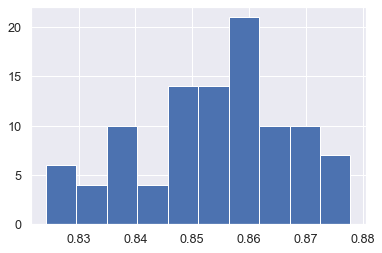

95.0 confidence interval 82.7% and 87.6%


In [54]:
 #plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

#### Resampling with Random Forest Regressor

In [51]:
from sklearn.utils import resample
values = concrete_XY.values
# Number of bootstrap samples to create
n_iterations = 100        
# size of a bootstrap sample
n_size = int(len(data_df) * 1)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    gbmTree = RandomForestRegressor(n_estimators=50)
    # fit against independent variables and corresponding target values
    gbmTree.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = gbmTree.score(test[:, :-1] , y_test)
    predictions = gbmTree.predict(test[:, :-1])  

    stats.append(score)

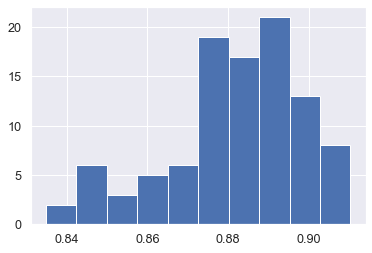

95.0 confidence interval 84.4% and 90.7%


In [52]:
#plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

#### Inference
The bootstrap random forest classification model performance is between 84.4%-90.7% followed by Gradient Boosting Regressor classification model 